In [4]:
import pandas as pd 
df1 = pd.DataFrame([['bird', 'polly'], ['monkey', 'george']],columns=['animal', 'name'])
df2 = pd.DataFrame([['eeeee'], ['aedde']],columns=['y'])
pd.concat([df1, df2], axis=1)

,animal,name,y
0,bird,polly,eeeee
1,monkey,george,aedde


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn.calibration import LabelEncoder
import xgboost as xgb
from sklearn.metrics import classification_report

In [16]:
df_test_full = pd.read_csv("test-full.csv")
df_train = pd.read_csv("train.csv")
y = df_train["Cover_Type"]
X = df_train.drop(["Cover_Type"], axis=1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)#, stratify=y)

In [18]:


le = LabelEncoder()
y_train = le.fit_transform(y_train)
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred = le.inverse_transform(y_pred)

In [13]:
y_pred = le.inverse_transform(y_pred)
res = pd.DataFrame(y_pred, columns=["Cover_Type"])
res = res.rename_axis('Id')
res = res.set_index(res.index +1)
current_date = datetime.now().strftime("%H.%M.%S-%Y-%m-%d")
res.to_csv(f"Output/Submission_{current_date}.csv")

OSError: Cannot save file into a non-existent directory: 'Output'

In [10]:


clf = xgb.XGBRFClassifier()

le = LabelEncoder()
y = le.fit_transform(y)

clf.fit(X, y)
y_pred = clf.predict(X)
# y_pred = le.inverse_transform(y_pred)

In [19]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           1       0.81      0.81      0.81       543
           2       0.74      0.83      0.78       506
           3       0.87      0.88      0.88       508
           4       0.96      0.96      0.96       552
           5       0.96      0.89      0.93       609
           6       0.89      0.87      0.88       523
           7       0.96      0.96      0.96       539

    accuracy                           0.89      3780
   macro avg       0.89      0.89      0.89      3780
weighted avg       0.89      0.89      0.89      3780



[[440  73   0   0  11   2  17]
 [ 87 418   9   0  38   8   5]
 [  0   2 446  14   7  41   0]
 [  0   0   9 530   0  11   0]
 [  1  10   4   0 545   7   0]
 [  0   3  40   8   4 454   0]
 [ 15   0   0   0   4   0 517]]


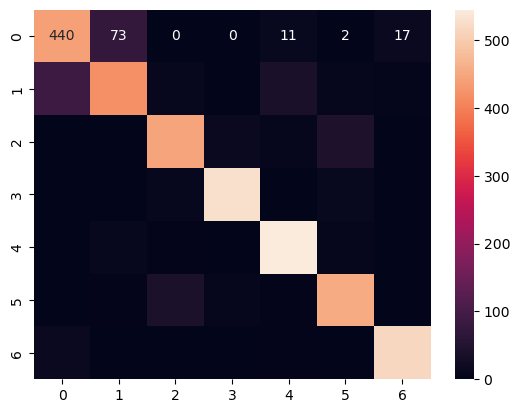

In [ ]:

cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt="d")
print(cf_matrix)

## Random Forest

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.40, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, random_state=42, test_size=.50, stratify=y_test)

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=90)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=90)

In [ ]:
rfc.score(X_test, y_test)

0.8783068783068783

In [ ]:
rfc.score(X_val, y_val)

0.8601190476190477

In [ ]:
X_train_test = pd.concat([X_train, X_test])
y_train_test = np.concatenate([y_train, y_test])

In [ ]:
np.linspace(50,150, 11, dtype=int)

array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150])

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    "n_estimators" :np.linspace(50,150, 11, dtype=int),
    # "max_depth" : [5, 8, 10]
}

gscv = GridSearchCV(RandomForestClassifier(), params, verbose=3, cv=5)
gscv.fit(X_train_test, y_train_test)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
[CV 1/5] END ...................n_estimators=50;, score=0.858 total time=   1.6s
[CV 2/5] END ...................n_estimators=50;, score=0.864 total time=   1.0s
[CV 3/5] END ...................n_estimators=50;, score=0.873 total time=   1.0s
[CV 4/5] END ...................n_estimators=50;, score=0.877 total time=   1.0s
[CV 5/5] END ...................n_estimators=50;, score=0.877 total time=   1.0s
[CV 1/5] END ...................n_estimators=60;, score=0.857 total time=   1.2s
[CV 2/5] END ...................n_estimators=60;, score=0.862 total time=   1.2s
[CV 3/5] END ...................n_estimators=60;, score=0.879 total time=   1.2s
[CV 4/5] END ...................n_estimators=60;, score=0.874 total time=   1.2s
[CV 5/5] END ...................n_estimators=60;, score=0.883 total time=   1.3s
[CV 1/5] END ...................n_estimators=70;, score=0.857 total time=   1.5s
[CV 2/5] END ...................n_estimators=70;

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150])},
             verbose=3)

In [ ]:
impo = gscv.best_estimator_.feature_importances_
np.argsort(impo)[::-1]

array([ 1,  0,  6, 10,  4, 14,  5,  7,  2,  8,  9,  3, 24, 13, 52, 11, 53,
       17, 18, 54, 44, 16, 27, 31, 43, 26, 37, 47, 36, 46, 12, 38, 25, 20,
       45, 49, 34, 15, 19, 30, 28, 32, 33, 51, 40, 42, 48, 41, 50, 22, 35,
       23, 39, 29, 21])

In [ ]:
predict_t=rfc.predict(df_test_full)

In [ ]:
submission = pd.DataFrame({'Id': df_test_full.index+1,
                       'Cover_Type': predict_t + 1})
submission.head()

,Id,Cover_Type
0,1,5
1,2,5
2,3,2
3,4,5
4,5,5


In [ ]:
submission.to_csv('submission.csv', index=False)    

## 2 Models 1-2 & 3-4-5-6

### Load and split the data

In [ ]:
df_train.Cover_Type.value_counts()

1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
Name: Cover_Type, dtype: int64

In [ ]:
X2 = df_train.copy()
X2["under2"] = (X2["Cover_Type"] < 3).astype(int)

In [ ]:
# Split between cover type >2 and <=2
# 1 -2
X2_under = X2.where(X2["under2"] == 1)
X2_under.dropna(inplace=True)
X2_under = X2_under.astype(int) # @TODO c'est bizarre

y2_under = X2_under["Cover_Type"]
X2_under = X2_under.drop(["under2", "Cover_Type"], axis=1)

# 3-4-5-6
X2_above = X2.where(X2["under2"] == 0)
X2_above.dropna(inplace=True)
X2_above = X2_above.astype(int) # @TODO c'est bizarre

y2_above = X2_above["Cover_Type"]
X2_above = X2_above.drop(["under2", "Cover_Type"], axis=1)

In [ ]:
y2 = X2["under2"]
X2 = X2.drop(["under2", "Cover_Type"], axis=1)

### 1st model to separete betwen under or above 2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.25, random_state=42, stratify=y2)

model = xgb.XGBClassifier(n_estimators=200, max_depth=15)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2700
           1       0.97      0.93      0.95      1080

    accuracy                           0.97      3780
   macro avg       0.97      0.96      0.96      3780
weighted avg       0.97      0.97      0.97      3780



<Axes: >

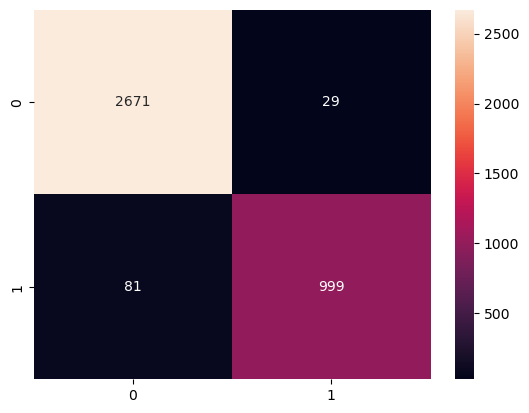

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt="d")

### 2nd model to predict in each model

#### 1. Cover Type 1 and 2

In [ ]:
Xu_train, Xu_test, yu_train, yu_test = train_test_split(X2_under, y2_under, test_size=0.25, random_state=42, stratify=y2_under)

le = LabelEncoder()
yu_train = le.fit_transform(yu_train)

model = xgb.XGBClassifier(n_estimators=200, max_depth=15)
model.fit(Xu_train, yu_train)
y2u_pred = model.predict(Xu_test)
y2u_pred = le.inverse_transform(y2u_pred)

              precision    recall  f1-score   support

           1       0.84      0.85      0.85       540
           2       0.85      0.84      0.84       540

    accuracy                           0.85      1080
   macro avg       0.85      0.85      0.85      1080
weighted avg       0.85      0.85      0.85      1080



<Axes: >

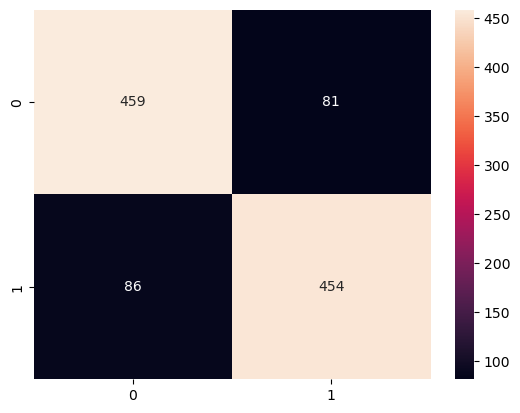

In [ ]:
print(classification_report(yu_test, y2u_pred))
cf_matrix = confusion_matrix(yu_test, y2u_pred)
sns.heatmap(cf_matrix, annot=True, fmt="d")

#### 2. Cover Type 3, 4, 5, 6

In [ ]:
Xa_train, Xa_test, ya_train, ya_test = train_test_split(X2_above, y2_above, test_size=0.25, random_state=42, stratify=y2_above)

le = LabelEncoder()
ya_train = le.fit_transform(ya_train)

model = xgb.XGBClassifier(objective="multi:softmax")
model.fit(Xa_train, ya_train)
y2a_pred = model.predict(Xa_test)
y2a_pred = le.inverse_transform(y2a_pred)

              precision    recall  f1-score   support

           3       0.92      0.89      0.90       540
           4       0.96      0.98      0.97       540
           5       0.97      0.99      0.98       540
           6       0.89      0.89      0.89       540
           7       1.00      1.00      1.00       540

    accuracy                           0.95      2700
   macro avg       0.95      0.95      0.95      2700
weighted avg       0.95      0.95      0.95      2700



<Axes: >

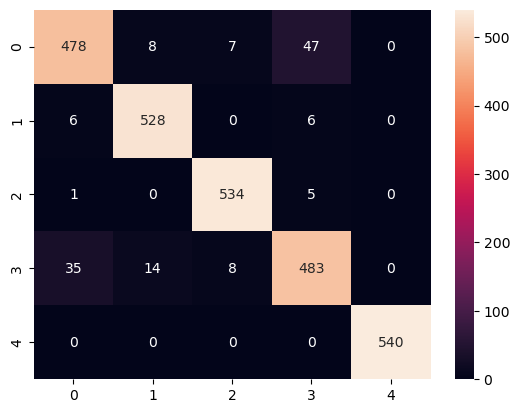

In [ ]:
print(classification_report(ya_test, y2a_pred))
cf_matrix = confusion_matrix(ya_test, y2a_pred)
sns.heatmap(cf_matrix, annot=True, fmt="d")

### Reconstruct prediction

In [ ]:
final_pred = np.concatenate([y2u_pred, y2a_pred]).astype(int)
final_pred

array([1, 2, 2, ..., 4, 6, 6])

In [ ]:
final_X = pd.concat([Xu_test, Xa_test])
final_X["Cover_Type"] = final_pred
final_X

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
2038,206094,3237,103,5,30,-2,6122,229,233,138,...,0,0,0,0,0,0,0,0,0,1
2572,246282,2762,254,16,95,19,1998,181,249,205,...,0,0,0,0,0,0,0,0,0,2
3925,558985,2599,219,28,42,28,1581,178,253,198,...,0,0,0,0,0,0,0,0,0,2
2275,263924,2902,309,7,418,104,1863,202,236,173,...,0,0,0,0,0,0,0,0,0,2
4299,107717,2812,354,27,234,96,3197,166,183,148,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8065,265424,2117,34,14,0,0,1231,217,207,122,...,0,0,0,0,0,0,0,0,0,4
10882,282546,2226,108,22,67,37,1487,251,209,75,...,0,0,0,0,0,0,0,0,0,6
8094,268649,2137,34,23,30,4,1183,210,184,99,...,0,0,0,0,0,0,0,0,0,4
12716,282950,2288,290,20,162,24,1752,159,233,212,...,0,0,0,0,0,0,0,0,0,6


In [ ]:
submission = pd.DataFrame({'Id': final_X.Id,
                       'Cover_Type': final_X.Cover_Type})

submission.to_csv('Output/submission.csv', index=False)  

## Data

In [ ]:
col = list(X.columns)[1:] + ["Cover_Type"]

In [ ]:
data = pd.read_csv('covertype/covtype.data.gz', compression='gzip')
new_col = dict(zip(data.columns, col))
data = data.rename(columns=new_col)
data.insert(0, "Id", data.index)

In [ ]:
y_vrai = data[["Id","Elevation", "Cover_Type"]]
y_vrai.head()

,Id,Elevation,Cover_Type
0,0,2590,5
1,1,2804,2
2,2,2785,2
3,3,2595,5
4,4,2579,2


In [ ]:

# Supposons que df soit votre DataFrame initial et df_train soit votre DataFrame de train
# Remplacez 'ID' par le nom de votre colonne d'intérêt

# Fusionnez les DataFrames sur la colonne 'ID'
merged_df = pd.merge(y_vrai, df_train[['Id']], on='Id', how='inner')

# Sélectionnez uniquement les lignes de df qui ont les mêmes valeurs dans la colonne 'ID' que dans df_train
selected_rows = merged_df.drop_duplicates(subset='Id', keep='first')

# Affichez les lignes sélectionnées
print(selected_rows)
merged_df.describe()

           Id  Elevation  Cover_Type
0           5       2606           5
1          11       2742           2
2          14       2495           5
3          16       2517           5
4          19       2501           5
...       ...        ...         ...
15115  580950       2438           3
15116  580952       2442           3
15117  580976       2404           3
15118  580989       2455           3
15119  581005       2401           3

[15120 rows x 3 columns]


,Id,Elevation,Cover_Type
count,15120.000000,15120.000000,15120.000000
mean,267008.526389,2759.127646,3.704365
std,179261.722330,417.792967,2.058097
min,5.000000,1879.000000,1.000000
25%,103705.000000,2388.000000,2.000000
50%,276034.500000,2766.000000,3.000000
75%,398150.250000,3131.000000,6.000000
max,581005.000000,3850.000000,7.000000


In [ ]:
# df_train.sort_values(by='Id', axis=1).head()
df_train[["Id", "Elevation", "Cover_Type"]].describe()

,Id,Elevation,Cover_Type
count,15120.000000,15120.000000,15120.000000
mean,267008.526389,2748.649934,4.000000
std,179261.722330,419.009589,2.000066
min,5.000000,1877.000000,1.000000
25%,103705.000000,2373.000000,2.000000
50%,276034.500000,2754.000000,4.000000
75%,398150.250000,3109.000000,6.000000
max,581005.000000,3850.000000,7.000000


In [ ]:
df_train.sort_values(by='Id')["Cover_Type"]
merged_df["Cover_Type"]

0        5
1        2
2        5
3        5
4        5
        ..
15115    3
15116    3
15117    3
15118    3
15119    3
Name: Cover_Type, Length: 15120, dtype: int64

In [ ]:
(df_train.sort_values(by='Id')["Cover_Type"].reset_index()["Cover_Type"]==merged_df["Cover_Type"]).mean()

0.7941798941798942

In [ ]:
df_train[df_train["Id"]<5]

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type


In [ ]:
df_test_full[df_test_full["Id"]<5]

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,0
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,0
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,0
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,0


# 2MODELS
Predictions based on 2 models
1. Classify between 1-2 and 3-4-5-6-7
2. For each class, find the cover_Type


In [ ]:
from sklearn.ensemble import AdaBoostClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from utils import *

def split_in_two_df(df: pd.DataFrame):
    if "under2" not in df.columns:
        # Split between cover type >2 and <=2
        df["under2"] = (df["Cover_Type"] < 3).astype(int)
    
    # 1 -2
    df_under = df.where(df["under2"] == 1)
    df_under.dropna(inplace=True)
    df_under = df_under.astype(int)  # @TODO c'est bizarre

    # 3-4-5-6-7
    df_above = df.where(df["under2"] == 0)
    df_above.dropna(inplace=True)
    df_above = df_above.astype(int)  # @TODO c'est bizarre

    return df, df_under, df_above


def get_X_y(df: pd.DataFrame, target_col=None):
    X = df.copy()
    if target_col == "under2":
        X.drop(["Cover_Type"], axis=1, inplace=True)
    elif target_col == "Cover_Type":
        X.drop(["under2"], axis=1, inplace=True)
    if target_col in X.columns:
        y = X[target_col]
        X.drop([target_col], axis=1, inplace=True)
        return X, y
    else:
        # X.drop(["under2", "Cover_Type"], axis=1, inplace=True)
        return X


def train_first_model(X, y, model, test_size=0.25, seed=42, startify=True):
    if startify:
        strf = y
    else:
        strf = None

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=seed, stratify=strf)

    model.fit(X, y)
    # model.fit(X_train, y_train)
    # y_pred = model.predict(X_test)

    return model


def train_second_model(X, y, model, test_size=0.25, seed=42, startify=True):
    if startify:
        strf = y
    else:
        strf = None
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=seed, stratify=strf)

    le = LabelEncoder()
    y_train = le.fit_transform(y_train)

    model.fit(X, le.fit_transform(y))
    # model.fit(X_train, y_train)
    # y_pred = model.predict(X_test)
    # y_pred = le.inverse_transform(y_pred)

    return model

def get_stack_clf():
    SEED = 42
    estimators = [
        ('rf', RandomForestClassifier(n_estimators=200, random_state=SEED)),
        # ('svr', make_pipeline(StandardScaler(),
        #                       LinearSVC(dual="auto", random_state=SEED))),
        ('xgb', xgb.XGBClassifier(n_estimators=200, random_state=SEED)),
        # ('xtree'), ExtraTreesClassifier(n_estimators=200, random_state=SEED),
        # ('ada', AdaBoostClassifier(estimator=RandomForestClassifier(n_estimators=100, random_state=SEED), algorithm="SAMME",n_estimators=200, random_state=SEED)),
        ('xgbrf', xgb.XGBRFClassifier(n_estimators=200, random_state=SEED)),
    ]
    clf = StackingClassifier(
        estimators=estimators, final_estimator=LogisticRegression(max_iter=150)
    )
    return clf

def get_stack_clf2():
    SEED = 42
    estimators = [
        ('rf', RandomForestClassifier(n_estimators=200, random_state=SEED)),
        # ('svr', make_pipeline(StandardScaler(),
        #                       LinearSVC(dual="auto", random_state=SEED))),
        ('xgb', xgb.XGBClassifier(n_estimators=200, random_state=SEED, objective="multi:softmax")),
        # ('xtree'), ExtraTreesClassifier(n_estimators=200, random_state=SEED),
        # ('ada', AdaBoostClassifier(estimator=RandomForestClassifier(n_estimators=100, random_state=SEED), algorithm="SAMME",n_estimators=200, random_state=SEED)),
        ('xgbrf', xgb.XGBRFClassifier(n_estimators=200, random_state=SEED, objective="multi:softmax")),
    ]
    clf = StackingClassifier(
        estimators=estimators, final_estimator=LogisticRegression(max_iter=150)
    )
    return clf


# Load training data
df_train = get_data_train()

# Split the data
df_train, df_train_under, df_train_above = split_in_two_df(df_train)
X_train_under, y_train_under = get_X_y(
    df_train_under, target_col='Cover_Type')
X_train_above, y_train_above = get_X_y(
    df_train_above, target_col='Cover_Type')
X_train, y_train = get_X_y(df_train, target_col='under2')

# Train first model
# model = xgb.XGBClassifier(n_estimators=200, max_depth=15)
model = get_stack_clf()
model1 = train_first_model(X_train, y_train, model)

# Train second model
# model2u = xgb.XGBClassifier(n_estimators=200, max_depth=15)
model2u = get_stack_clf()
model2u = train_second_model(
    X_train_under, y_train_under, model2u)

# model2a = xgb.XGBClassifier(objective="multi:softmax")
model2a = get_stack_clf2()
model2a = train_second_model(
    X_train_above, y_train_above, model2a)

# Load Testing data
df_test = get_data_test()

X_test = get_X_y(df_test)
y1_pred = model1.predict(X_test)

X_test["under2"] = y1_pred

df_test1, df_test_under, df_test_above = split_in_two_df(X_test)
X_test_under = get_X_y(df_test_under)
X_test_under.drop(["under2"], axis=1, inplace=True)
X_test_above = get_X_y(df_test_above)
X_test_above.drop(["under2"], axis=1, inplace=True)

y2u_pred = model2u.predict(X_test_under)
y2a_pred = model2a.predict(X_test_above)

# Convert prediction into Dataframe
pred_under = pd.DataFrame({'Id': X_test_under.Id, 'Cover_Type': y2u_pred+1})
pred_above = pd.DataFrame({'Id': X_test_above.Id, 'Cover_Type': y2a_pred+3})

final_pred = pd.concat([pred_under, pred_above])
final_pred_clean = clean_predictor(y_pred=final_pred.Cover_Type, Id=final_pred.Id)
csv_for_submission(final_pred_clean,"2model+stack")

# OTHER

## On predit un rf classique

In [ ]:
df_test = get_data_test()
df_train = get_data_train()

X = df_train.drop("Cover_Type", axis=1)
y = df_train["Cover_Type"]

In [ ]:
le = LabelEncoder()
clf = xgb.XGBClassifier()
clf.fit(X,le.fit_transform(y))
pred = clf.predict(df_test)
pred = le.inverse_transform(pred)

In [ ]:
predictions_df = pd.DataFrame(
        {'Id': df_test.Id, 'Cover_Type': pred})

In [ ]:
t = predictions_df[predictions_df["Id"].isin(
    df_train["Id"])]
tmp = df_train.copy()
tmp.sort_values("Id", inplace=True)
tmp = tmp[["Id", "Cover_Type"]]
# t["Cov2"] = tmp["Cover_Type"]
# pd.concat([t,tmp], axis=1)
t.reset_index(inplace=True)
tmp.reset_index(inplace=True)

t["Cov_Vrai"] = tmp["Cover_Type"]
t["diff"] = t["Cov_Vrai"] - t["Cover_Type"]

/var/folders/gl/ch56vc4j2vv9x57cscgmt2s00000gn/T/ipykernel_11989/39830394.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t["Cov_Vrai"] = tmp["Cover_Type"]
/var/folders/gl/ch56vc4j2vv9x57cscgmt2s00000gn/T/ipykernel_11989/39830394.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t["diff"] = t["Cov_Vrai"] - t["Cover_Type"]


<Axes: >

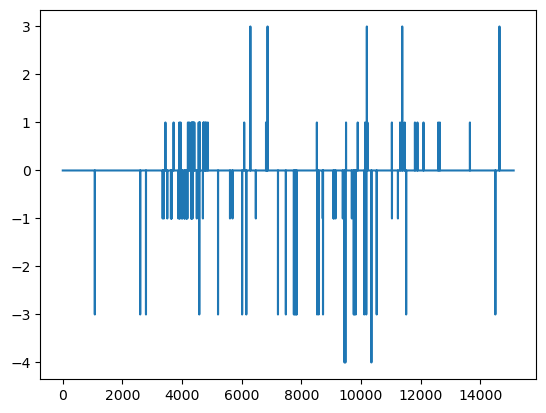

In [ ]:
t["diff"].plot()

In [ ]:
confusion_matrix(t["Cov_Vrai"], t["Cover_Type"])

array([[2122,   36,    0,    0,    2,    0,    0],
       [  38, 2110,    1,    0,   10,    1,    0],
       [   0,    0, 2146,    0,    0,   14,    0],
       [   0,    0,    0, 2160,    0,    0,    0],
       [   0,    0,    0,    0, 2160,    0,    0],
       [   0,    0,    5,    0,    1, 2154,    0],
       [   0,    0,    0,    0,    0,    0, 2160]])

In [ ]:
# Removing those in df_train
t = predictions_df.drop(predictions_df[predictions_df["Id"].isin(
    df_train["Id"])].index)

# Adding df_train instead
predictions_df = pd.concat(
    [df_train[['Id', 'Cover_Type']], predictions_df], axis=0, ignore_index=True)

# Sorting by Id (just in case)
predictions_df.sort_values("Id", inplace=True)

In [ ]:
t = predictions_df[predictions_df["Id"].isin(
    df_train["Id"])]
tmp = df_train.copy()
tmp.sort_values("Id", inplace=True)
tmp = tmp[["Id", "Cover_Type"]]
# t["Cov2"] = tmp["Cover_Type"]
# pd.concat([t,tmp], axis=1)
t.reset_index(inplace=True)
tmp.reset_index(inplace=True)

t["Cov_Vrai"] = tmp["Cover_Type"]
t["diff"] = t["Cov_Vrai"] - t["Cover_Type"]

/var/folders/gl/ch56vc4j2vv9x57cscgmt2s00000gn/T/ipykernel_11989/39830394.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t["Cov_Vrai"] = tmp["Cover_Type"]
/var/folders/gl/ch56vc4j2vv9x57cscgmt2s00000gn/T/ipykernel_11989/39830394.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t["diff"] = t["Cov_Vrai"] - t["Cover_Type"]


In [ ]:
t

,index,Id,Cover_Type,Cov_Vrai,diff
0,15125,5,5,5.0,0.0
1,15124,5,5,5.0,0.0
2,10190,5,5,5.0,0.0
3,15131,11,5,5.0,0.0
4,15132,11,5,5.0,0.0
...,...,...,...,...,...
45355,611226,580989,3,NaN,NaN
45356,4996,580989,3,NaN,NaN
45357,5649,581005,3,NaN,NaN
45358,611243,581005,3,NaN,NaN


<Axes: >

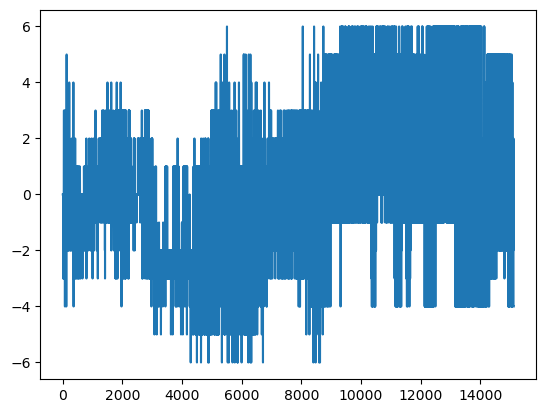

In [ ]:
t["diff"].plot()

In [ ]:
confusion_matrix(t["Cov2"],t["Cover_Type"])

# Soft classifier

## Implementation en encodant la target

In [ ]:
from utils import *
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb

df_train = get_data_train()
df_test = get_data_test()

X_tr = df_train.drop("Cover_Type", axis=1)
y_tr = df_train[["Cover_Type"]]

enc = OneHotEncoder(sparse_output=False)
y_tr1 = enc.fit_transform(y_tr)
y_tr1 = pd.DataFrame(y_tr1, columns=enc.categories_)

model = xgb.XGBRegressor()
model.fit(X_tr, y_tr1)
pred = model.predict(df_test)

# pred = pd.DataFrame(pred, columns=y_tr1.columns)

# verif = pd.concat([pred, y_tr], axis=1)
# verif["max"] = pred.apply(lambda row: row.idxmax()[0], axis=1)
# 1-(verif["Cover_Type"] - verif["max"]).value_counts()

In [ ]:
final_pred = np.argmax(pred, axis=1) + 1#pred.apply(lambda row: row.idxmax()[0], axis=1)
final_pred_clean = clean_predictor(y_pred=final_pred, Id=df_test.Id)
csv_for_submission(final_pred_clean,"soft_classif")

### Verif si on obtient le même res que sur Kaggle 

In [ ]:
def IWCV_perso(df_train=None,
         predictor=RandomForestClassifier(n_estimators=100, random_state=42),
         k_valid=10,
         verbose=0):
    """
    df_train: training data
    predictor: classifier (can be a sklearn pipeline)
    k_valid: number of cross-validations desired

    """
    COEFFS = np.array([2.63, 3.06, 0.43, 0.05, 0.24, 0.27, 0.32])

    if df_train is None:
        df_train = get_data_train()

    if "Wilderness_Area_Synth" in df_train.columns:
        df_train = df_train.drop(columns="Wilderness_Area_Synth")

    # Separate features and target
    X_train = df_train.drop('Cover_Type', axis=1)
    y_train = df_train['Cover_Type']

    class_accuracies = np.zeros((k_valid, 7))

    for i in range(k_valid):
        if verbose:
            print(f"Fold {i+1}")

        data_train, data_test, target_train, target_test = train_test_split(
            X_train, y_train, test_size=1/k_valid
        )

        enc = OneHotEncoder(sparse_output=False)
        y_tr1 = enc.fit_transform(pd.DataFrame(target_train))
        y_tr1 = pd.DataFrame(y_tr1, columns=enc.categories_)

        predictor.fit(data_train, y_tr1)
        pred = predictor.predict(data_test)

        y_pred = np.argmax(pred, axis=1) + 1

        for label in range(1, 8):
            class_accuracies[i, label - 1] = accuracy_score(target_test[target_test == label],
                                                            y_pred[target_test == label])
        if verbose:
            print("Accuacy", class_accuracies[i, :])
    IMCV = np.mean(class_accuracies @ COEFFS) / np.sum(COEFFS)

    return IMCV, class_accuracies.mean(axis=0)

IWCV_perso(df_train, xgb.XGBRegressor(n_estimators=100), k_valid=5, verbose=1)

Fold 1


Accuacy [0.79196217 0.76247031 0.86622807 0.9775     0.94481236 0.87066975
 0.96803653]
Fold 2
Accuacy [0.82352941 0.70932755 0.8401937  0.97435897 0.96145125 0.90521327
 0.96634615]
Fold 3
Accuacy [0.82758621 0.72925764 0.89461358 0.96465696 0.94305239 0.91084337
 0.97189696]
Fold 4
Accuacy [0.77803204 0.7        0.87850467 0.98143852 0.96976744 0.88123515
 0.96805897]
Fold 5
Accuacy [0.77570093 0.71896956 0.88551402 0.97984887 0.95768374 0.89380531
 0.97742664]


(0.7889548125260795,
 array([0.79936215, 0.72400501, 0.87301081, 0.97556066, 0.95535344,
        0.89235337, 0.97035305]))

In [ ]:
# n_estimators=300
# (0.8010547302278208,
#  array([0.8007537 , 0.7485949 , 0.87687802, 0.97919291, 0.96015153,
#         0.89627481, 0.97578979]))

# n_estimators=500
# (0.8081310529445995,
#  array([0.81465534, 0.75412419, 0.87038567, 0.97568885, 0.95651654,
#         0.89688496, 0.97493947]))

## Stacking

In [3]:
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
import xgboost as xgb
from utils import *

SEED = 42
c_w = {0: 0.3930414829466814,
 1: 0.32704879737465736,
 2: 2.1672031720335854,
 3: 22.998535407512964,
 4: 3.58121043645486,
 5: 3.5428425083538624,
 6: 3.014845602619385}
estimators = [
    ('rf', RandomForestClassifier(n_estimators=200, random_state=SEED)),#, class_weight=c_w)),
    ('svr', make_pipeline(StandardScaler(),
                          LinearSVC(dual="auto", random_state=SEED))),
    ('xgb', xgb.XGBClassifier(n_estimators=200, random_state=SEED)),
    # ('xtree'), ExtraTreesClassifier(random_state=SEED),
    ('ada', AdaBoostClassifier(algorithm="SAMME",n_estimators=200, random_state=SEED)),
    ('xgbrf', xgb.XGBRFClassifier(n_estimators=200, random_state=SEED)),
    ('lgbm', LGBMClassifier(
    objective='multiclass',
    num_class=7,
    # class_weight={
    #     1: 0.4,
    #     2: 0.45,
    #     3: 0.04,
    #     4: 0.01,
    #     5: 0.04,
    #     6: 0.04,
    #     7: 0.04
    # },
    boosting_type='gbdt',
    num_leaves=31,
    n_estimators=300,
    verbose=0,
    n_jobs=-1
))
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=LGBMClassifier(
    objective='multiclass',
    num_class=7,
    # class_weight={
    #     1: 0.4,
    #     2: 0.45,
    #     3: 0.04,
    #     4: 0.01,
    #     5: 0.04,
    #     6: 0.04,
    #     7: 0.04
    # },
    boosting_type='gbdt',
    num_leaves=50,
    n_estimators=500,
    verbose=0,
    n_jobs=-1
)
)
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(
#     X_tr, y_tr, stratify=y_tr, random_state=SEED
# )
# clf.fit(X_train, y_train).score(X_test, y_test)
df_train = get_data_train()
X_tr = df_train.drop(columns=['Cover_Type'], axis=1)
y_tr = df_train['Cover_Type']
clf.fit(X_tr, y_tr)
df_test=get_data_test()
pred = clf.predict(df_test)
final_pred_clean = clean_predictor(y_pred=pred, Id=df_test.Id)
csv_for_submission(final_pred_clean,"stacking + final=lgbm")

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [ ]:
test1 = pd.read_csv("Output/stacking.csv")
test2 = pd.read_csv("Output/stacking2.csv")
test2.rename(columns={"Cover_Type":"CT"}, inplace=True)
ttt = pd.concat([test1, test2], axis=1)

In [ ]:
ttt["Diff"] = ttt["Cover_Type"]-ttt["CT"]
ttt.Diff.value_counts()


/var/folders/gl/ch56vc4j2vv9x57cscgmt2s00000gn/T/ipykernel_19043/3911891683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttt["Diff"] = ttt["Cover_Type"]-ttt["CT"]


0    581012
Name: Diff, dtype: int64

In [ ]:
# maxiter=100 => 0.8962962962962963
# maxiter=200 => 0.8952

In [ ]:
# 0-Accuacy [0.83916084 0.80456853 0.90970655 0.98461538 0.94945055 0.90654206
#  0.95714286]
# 1-Accuacy [0.80898876 0.73972603 0.86893204 0.97560976 0.93873085 0.88729017
#  0.96404494]

In [ ]:
from utils import IWCV
IWCV(df_train, clf, 5,1)

Fold 0


/Users/francois/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuacy [0.8115942  0.77522936 0.88461538 0.96781609 0.93208431 0.90196078
 0.96559633]
Fold 1


/Users/francois/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuacy [0.81363636 0.77555556 0.88195991 0.9756691  0.95399516 0.90931373
 0.98233996]
Fold 2


/Users/francois/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuacy [0.86097561 0.78026906 0.89333333 0.98214286 0.94736842 0.91588785
 0.95990566]
Fold 3


/Users/francois/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuacy [0.80630631 0.77934272 0.90160183 0.97690531 0.93679458 0.91211401
 0.96904762]
Fold 4


/Users/francois/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuacy [0.8344519  0.77751196 0.86394558 0.95952381 0.93665158 0.89598109
 0.97690531]


(0.8229815491991734,
 array([0.82539288, 0.77758173, 0.88509121, 0.97241143, 0.94137881,
        0.90705149, 0.97075898]))

## 1 model per cover Type

In [ ]:
from utils import *

df_train = get_data_train()
df_test = get_data_test()

X_tr = df_train.drop("Cover_Type", axis=1)
y_tr = df_train["Cover_Type"]

Je test sur le train pour vois i on est bien à 100%

In [ ]:
def create_binary_column(df, i):
    y = df["Cover_Type"].apply(lambda x: 1 if x == i else -1)
    X = df.drop("Cover_Type", axis=1)
    return X, y

X_1, y_1 = create_binary_column(df_train, 1)
model = RandomForestClassifier()
model.fit(X_1, y_1)
pred = model.predict_proba(X_1)

Je test avec train_test_split pour voir ce que ça donne 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_tr, y_tr, test_size=.3, stratify=y_tr)

def create_binary_column(y, i):
    return  np.where(y == i, 1, 0)
for i in range(1,8):
    print(i)
    y_i = create_binary_column(y_train, i)
    model = xgb.XGBClassifier(n_estimators=200)
    model.fit(X_train, y_i)
    pred = model.predict(X_test)
    print(pd.Series(y_test[pred == 1]).value_counts())

1
1    503
2    106
7     12
5      1
Name: Cover_Type, dtype: int64
2
2    432
1     79
5      9
3      2
6      1
Name: Cover_Type, dtype: int64
3
3    545
6     38
2     12
4      6
5      2
Name: Cover_Type, dtype: int64
4
4    630
3     23
6     15
Name: Cover_Type, dtype: int64
5
5    615
2     28
3      6
1      4
6      3
Name: Cover_Type, dtype: int64
6
6    553
3     38
2     11
4      6
5      4
1      2
Name: Cover_Type, dtype: int64
7
7    632
1     31
2      1
Name: Cover_Type, dtype: int64


In [ ]:
pd.Series(y_test).value_counts()

4    648
3    648
5    648
2    648
1    648
6    648
7    648
Name: Cover_Type, dtype: int64

In [ ]:
pd.DataFrame({"col1":[1, 2, 3], "col2":[1, 2, 3], "col3":[1, 2, 3]})

,col1,col2,col3
0,1,1,1
1,2,2,2
2,3,3,3


In [ ]:
from sklearn.linear_model import LogisticRegression

predictions = {}
pred_train = {}
for i in range(1,8):
    y_i = create_binary_column(y_tr, i)
    model = RandomForestClassifier(n_estimators=200)
    model.fit(X_tr, y_i)
    train = model.predict_proba(X_tr)
    pred = model.predict_proba(df_test)
    # pred = pred[:,1] # Je garde uniquement la proba de bien predire le CT i
    predictions[f"{i}"] = pred[:,1]
    pred_train[f'{i}'] = train[:,1]

meta_model = LogisticRegression()
meta_model.fit(pd.DataFrame(pred_train), y_tr)
final_pred = meta_model.predict(pd.DataFrame(predictions))


In [ ]:
final_pred_clean = clean_predictor(y_pred=final_pred, Id=df_test.Id)
csv_for_submission(final_pred_clean,"stacking7models")

In [ ]:
print(classification_report(y_test, final_pred))

              precision    recall  f1-score   support

           1       0.79      0.80      0.80       648
           2       0.82      0.73      0.77       648
           3       0.87      0.87      0.87       648
           4       0.94      0.98      0.96       648
           5       0.91      0.96      0.93       648
           6       0.87      0.86      0.86       648
           7       0.93      0.96      0.94       648

    accuracy                           0.88      4536
   macro avg       0.88      0.88      0.88      4536
weighted avg       0.88      0.88      0.88      4536



In [ ]:
from sklearn.ensemble import AdaBoostClassifier

#IWCV personalisé
def IWCV_stacking_7models(df_train=None,
         predictor=RandomForestClassifier(n_estimators=100, random_state=42),
         k_valid=10,
         verbose=0):
    """
    df_train: training data
    predictor: classifier (can be a sklearn pipeline)
    k_valid: number of cross-validations desired

    """
    COEFFS = np.array([2.63, 3.06, 0.43, 0.05, 0.24, 0.27, 0.32])

    if df_train is None:
        df_train = get_data_train()

    if "Wilderness_Area_Synth" in df_train.columns:
        df_train = df_train.drop(columns="Wilderness_Area_Synth")

    # Separate features and target
    X_train = df_train.drop('Cover_Type', axis=1)
    y_train = df_train['Cover_Type']

    class_accuracies = np.zeros((k_valid, 7))

    for i in range(k_valid):
        if verbose:
            print(f"Fold {i+1}")
        data_train, data_test, target_train, target_test = train_test_split(
            X_train, y_train, test_size=1/k_valid
        )


        predictions = {}
        pred_train = {}
        for c in range(1,8):
            y_i = create_binary_column(target_train, c)
            predictor.fit(data_train, y_i)
            train = predictor.predict_proba(data_train)
            pred = predictor.predict_proba(data_test)
            # pred = pred[:,1] # Je garde uniquement la proba de bien predire le CT i
            predictions[f"{c}"] = pred[:,1]
            pred_train[f'{c}'] = train[:,1]

        meta_model = LogisticRegression()
        meta_model.fit(pd.DataFrame(pred_train), target_train)
        y_pred = meta_model.predict(pd.DataFrame(predictions))

        for label in range(1, 8):
            class_accuracies[i, label - 1] = accuracy_score(target_test[target_test == label],
                                                            y_pred[target_test == label])
        if verbose:
            print("Accuacy", class_accuracies[i, :])
    IMCV = np.mean(class_accuracies @ COEFFS) / np.sum(COEFFS)

    return IMCV, class_accuracies.mean(axis=0)

IWCV_stacking_7models(
    df_train, 
    # xgb.XGBClassifier(n_estimators=150),
    AdaBoostClassifier(algorithm='SAMME', learning_rate=1.2, n_estimators=400),
    # RandomForestClassifier(n_estimators=200, random_state=42),
    k_valid=5, 
    verbose=1
    )

Fold 1
Accuacy [0.6744186  0.46206897 0.72972973 0.94183445 0.91685912 0.67898383
 0.92482916]
Fold 2
Accuacy [0.71685393 0.45299145 0.64203233 0.95724466 0.90866511 0.66339066
 0.94799054]
Fold 3
Accuacy [0.68577982 0.40669856 0.70574163 0.96017699 0.90191388 0.66591928
 0.91055046]
Fold 4
Accuacy [0.66055046 0.47743468 0.71190476 0.95804196 0.88139535 0.6440281
 0.90672451]
Fold 5
Accuacy [0.67160494 0.47887324 0.67538126 0.96832579 0.92099323 0.6778043
 0.91627907]


(0.6036163983593514,
 array([0.68184155, 0.45561338, 0.69295794, 0.95712477, 0.90596534,
        0.66602524, 0.92127475]))

In [ ]:
pd.DataFrame(predictions)

,1,2,3,4,5,6,7
0,0.100,0.895,0.000,0.000,0.025,0.000,0.000
1,0.430,0.430,0.005,0.000,0.020,0.005,0.010
2,0.045,0.050,0.010,0.005,0.000,0.005,0.970
3,0.000,0.040,0.810,0.005,0.000,0.065,0.000
4,0.080,0.010,0.005,0.000,0.000,0.005,0.920
...,...,...,...,...,...,...,...
4531,0.000,0.000,0.035,0.985,0.000,0.015,0.000
4532,0.030,0.375,0.000,0.000,0.165,0.260,0.000
4533,0.000,0.005,0.040,0.890,0.000,0.005,0.000
4534,0.275,0.020,0.000,0.000,0.000,0.000,0.675


In [ ]:
# def create_binary_column(df, i):
#     y = df["Cover_Type"].apply(lambda x: 1 if x == i else -1)
#     X = df.drop("Cover_Type", axis=1)
#     return X, y
def create_binary_column(y, i):
    return  np.where(y == i, 1, -1)

X_1, y_1 = create_binary_column(df_train, 1)
model = xgb.XGBClassifier()
model.

0        1
1        1
2        1
3        1
4        1
        ..
15115   -1
15116   -1
15117   -1
15118   -1
15119   -1
Name: Cover_Type, Length: 15120, dtype: int64

In [ ]:
X_1, y_1 = create_binary_column(df_train, 1)
model = RandomForestClassifier()
model.fit(X_1, y_1)
pred = model.predict_proba(X_1)

In [ ]:
pred

array([[0.25, 0.75],
       [0.14, 0.86],
       [0.12, 0.88],
       ...,
       [0.97, 0.03],
       [0.99, 0.01],
       [1.  , 0.  ]])

In [ ]:
pred[:,1]

array([0.75, 0.86, 0.88, ..., 0.03, 0.01, 0.  ])